In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [5]:
if 'SalePrice' not in dftest.columns:
    dftest['SalePrice'] = 0

In [6]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


In [7]:
df = pd.concat([dftrain, dftest], axis = 0)

In [9]:
df = df.set_index('Id')

In [16]:
df.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [17]:
dfnull = df[df.isnull().sum()[df.isnull().sum() > 0].index]

<Axes: ylabel='Id'>

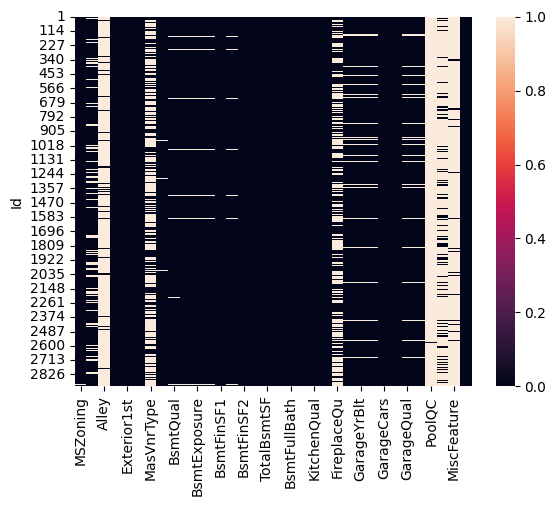

In [18]:
sns.heatmap(dfnull.isnull())

In [21]:
dfobj = df[df.select_dtypes(include = ['object']).columns]

In [23]:
df = df.drop(df[dfobj.isna().sum()[dfobj.isna().sum() > 1100].index], axis = 1)

In [25]:
dfobj = dfobj.drop(dfobj[dfobj.isna().sum()[dfobj.isna().sum() > 1100].index], axis = 1)

In [28]:
dfobj = dfobj.fillna('null')

In [31]:
dfobjencoded = pd.get_dummies(dfobj)

In [35]:
for i in dfobjencoded.columns:
    if 'null' in i:
        dfobjencoded = dfobjencoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [37]:
newdf = pd.concat([df, dfobjencoded], axis = 1)

In [38]:
len(newdf.columns)

304

In [40]:
newdf = newdf.drop(df.select_dtypes(include = ['object']), axis = 1)

In [41]:
newdf.isna().sum()[newdf.isna().sum() > 0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

In [47]:
modecol = [
    'GarageCars', 'GarageYrBlt', 'BsmtFullBath',
    'BsmtHalfBath'
]

meancol = [
    'LotFrontage', 'LotFrontage', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', 'GarageArea'
]

In [48]:
for i in modecol:
    newdf[i] = newdf[i].fillna(newdf[i].mode()[0])

In [49]:
for i in meancol:
    newdf[i] = newdf[i].fillna(np.round(newdf[i].mean()))

In [50]:
newdf.isna().sum()[newdf.isna().sum() > 0]

Series([], dtype: int64)

In [51]:
trainingdata = newdf[0:len(dftrain)]
testingdata = newdf[len(dftrain):]

In [52]:
testingdata = testingdata.drop(columns = 'SalePrice')

In [53]:
trainingdata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,True,False,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,True,False,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,True,False,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,True,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [54]:
testingdata.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,True,False,False,False,False,True,False
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,True,False,False,False,False,True,False
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,True,False,False,False,False,True,False


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [57]:
X = trainingdata.drop(columns = 'SalePrice')
Y = trainingdata['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

In [58]:
X_train.shape, Y_train.shape

((1168, 266), (1168, 1))

In [59]:
model1 = LinearRegression()

In [82]:
model1.fit(X, Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
pred1 = model1.predict(X_test)

In [84]:
mean_squared_error(Y_test, Ypred)

1157023471.2951415

In [74]:
model2 = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, random_state = 42)

In [85]:
model2.fit(X, Y)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [86]:
pred2 = model2.predict(X_test)

In [87]:
mean_squared_error(Y_test, pred2)

5783.70703125

In [78]:
model3 = RandomForestRegressor(n_estimators = 100)

In [88]:
model3.fit(X, Y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [89]:
pred3 = model3.predict(X_test)

In [90]:
mean_squared_error(Y_test, pred3)

126912644.8983911

In [91]:
pred = model2.predict(testingdata)

In [92]:
final = pd.DataFrame()
final['Id'] = testingdata.index
final['SalePrice'] = pred

In [93]:
final.head()

,Id,SalePrice
0,1461,130813.289062
1,1462,159367.890625
2,1463,184816.703125
3,1464,192874.375000
4,1465,196779.937500


In [94]:
final.to_csv('Final.csv', index = False)